# TP recalage d’images médicales

## Enoncé:
Travails à faire : 

Ce TP porte sur le recalage d’image qui consiste à une mise en correspondance entre les 
points de deux images appelées : image source et image référence (cible). Le recalage consiste 
donc à déterminer les meilleures transformations (selon une fonction de mesure), qui 
permettent de superposer l’image source sur l’image de référence. 
Dans ce TP, nous allons considérer une simple application de recalage d’images médicales de 
même modalité (monomodale par exemple IRM) et/ou de modalités différentes (multimodale 
par exemple : IRM et CT), selon les grands types de recalages


1) Charger deux images médicales: images de référence et image source

2) Donner après mise en correspondance des deux images, les paramètres des transformations rigides (vecteurs de translations et degrés de rotations) 

3) Commenter les résultats obtenus

4) Proposer une amélioration possible de ces résultats
## Objectif:
chargées les deux images source et cible, faire la mise en correspondance des deux images et calculer les paramètres des transformations rigides (vecteurs de translations et degrés de rotations) 

## Aproche:
nous debutons avec un Seuillage afin d'avoir un fond noire et ne garder que l'esentiel des informations sur l'image, ensuite notre aproche se base sur le centre de gravité pour la translation, le tatonement pour la rotation et le changement d'echel ainsi qu'une fonction de clalcul de l'erreur quadratique moyen pour la comparaisson de l'image trouvé avec l'image cible, le code source est commontées à chaque sequence. Les resultats ainsi que l'image de différence sont affiché a la fin. 

og.jpg:


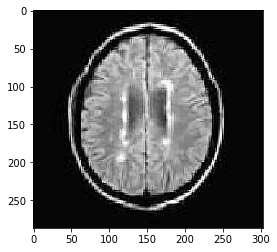

[[ 6.  6.  6. ...,  6.  6.  6.]
 [ 6.  6.  6. ...,  6.  6.  6.]
 [ 6.  6.  6. ...,  6.  6.  6.]
 ..., 
 [ 6.  6.  6. ...,  6.  6.  6.]
 [ 6.  6.  6. ...,  6.  6.  6.]
 [ 6.  6.  6. ...,  6.  6.  6.]]


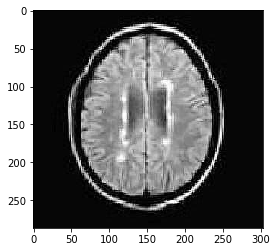

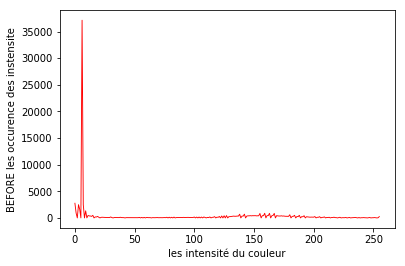

(140.98036696151087, 148.72719937843652)


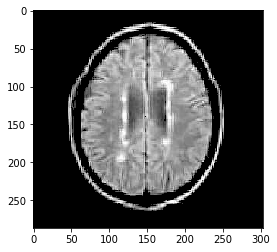

ill.jpg:


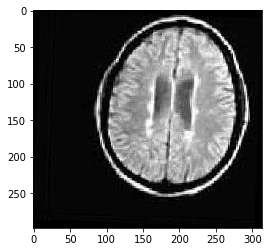

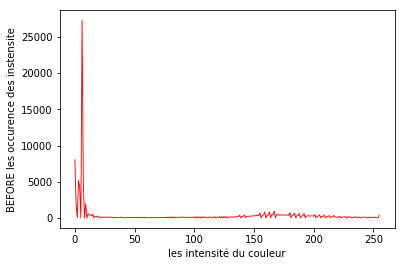

(124, 106)


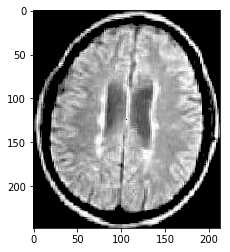

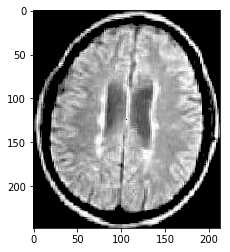

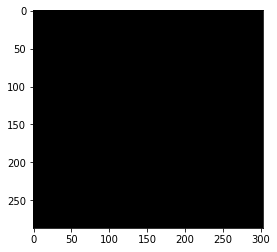

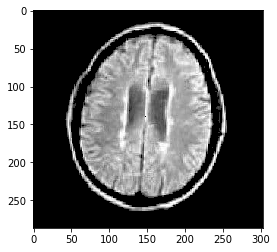

eqm 9808.96132522
0
0 = 9808.96132522 angle 0
0.1
1 = 9808.91188149 angle 0.1
0.2
2 = 9808.86069949 angle 0.2
0.30000000000000004
3 = 9808.80817936 angle 0.30000000000000004
0.4
4 = 9808.75477694 angle 0.4
0.5
5 = 9808.70098466 angle 0.5
0.6
6 = 9808.64724083 angle 0.6
0.7
7 = 9808.59350443 angle 0.7
0.7999999999999999
8 = 9808.53897485 angle 0.7999999999999999
0.8999999999999999
9 = 9808.48312507 angle 0.8999999999999999
0.9999999999999999
10 = 9808.42591259 angle 0.9999999999999999
1.0999999999999999
11 = 9808.3673599 angle 1.0999999999999999
1.2
12 = 9808.30751281 angle 1.2
1.3
13 = 9808.24665208 angle 1.3
1.4000000000000001
14 = 9808.18552585 angle 1.4000000000000001
1.5000000000000002
15 = 9808.1251908 angle 1.5000000000000002
1.6000000000000003
16 = 9808.06661969 angle 1.6000000000000003
1.7000000000000004
17 = 9808.01052373 angle 1.7000000000000004
1.8000000000000005
18 = 9807.95732007 angle 1.8000000000000005
1.9000000000000006
19 = 9807.90726859 angle 1.9000000000000006
19 = 9

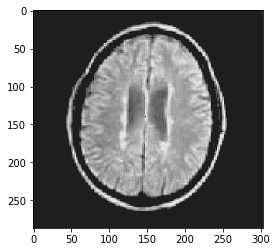

best angle is  19 th picture at eqm of = 9807.90726859 at an angle 1.9000000000000006
with vect translation of 16.9803669615 42.7271993784


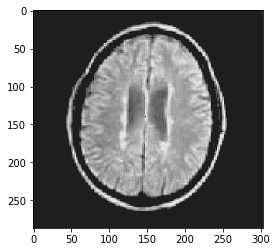

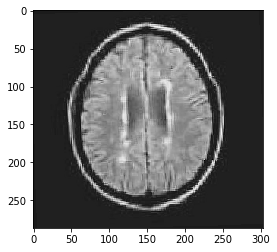

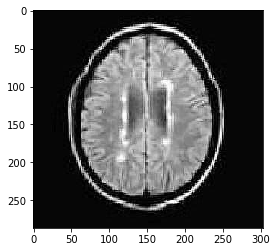

difference: 594.096208131


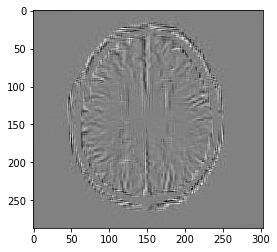

CT pancreas source.bmp:


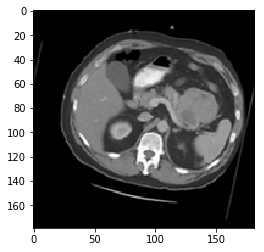

(179, 182)


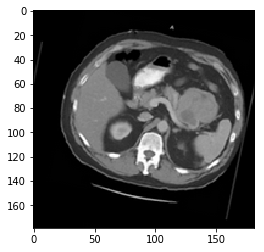

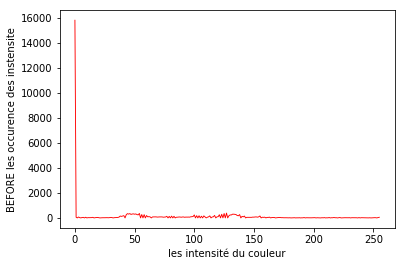

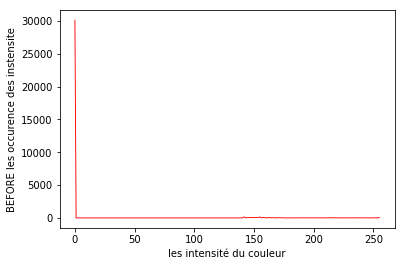

(91.411456232351753, 108.6345300524405)


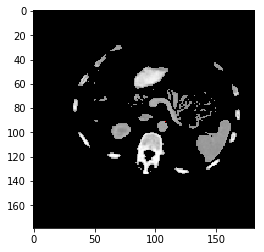

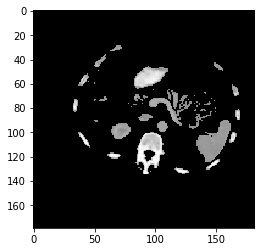

CT pancreas.bmp:


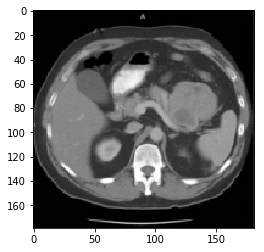

(179, 182)


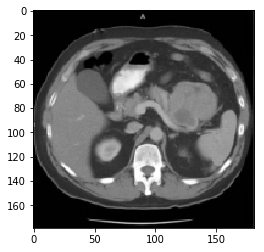

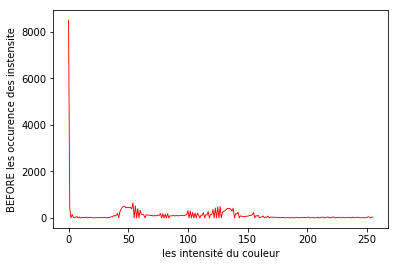

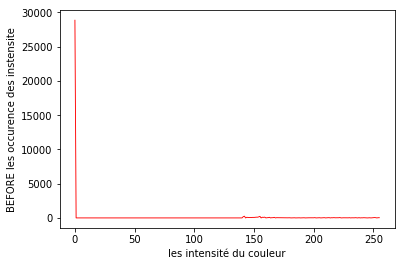

(89.5, 91.0)


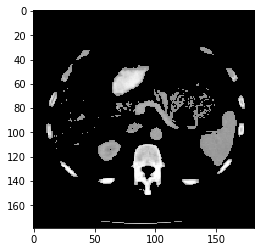

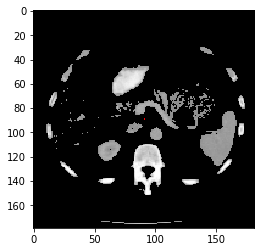

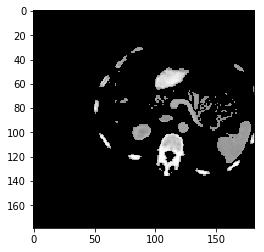

1


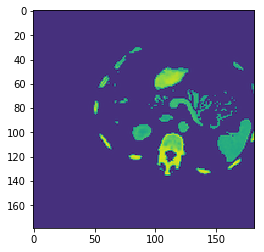

0 = 124 angle 1
2


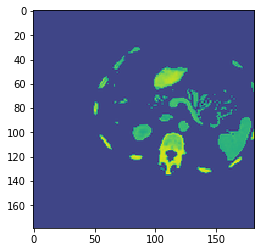

1 = 112 angle 2
3


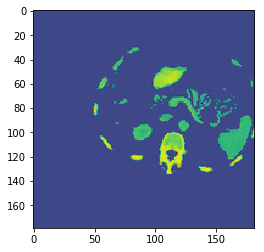

2 = 112 angle 3
4


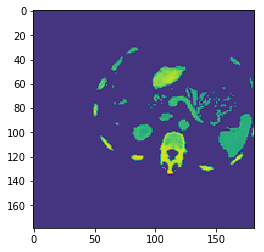

3 = 131 angle 4
5


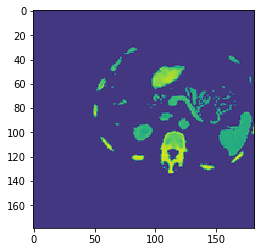

4 = 120 angle 5
6


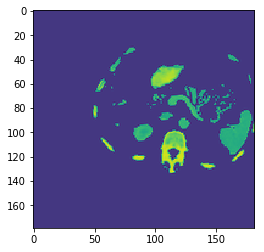

5 = 124 angle 6
7


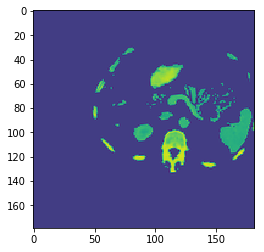

6 = 111 angle 7
8


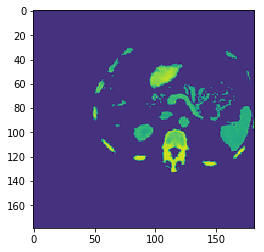

7 = 112 angle 8
9


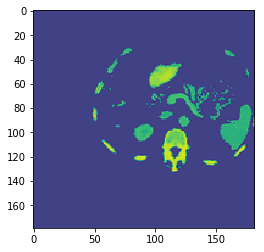

8 = 110 angle 9
10


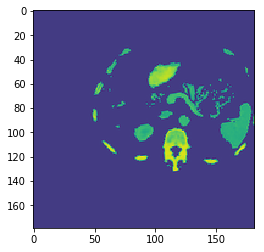

9 = 111 angle 10
11


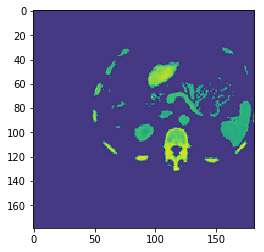

10 = 114 angle 11
12


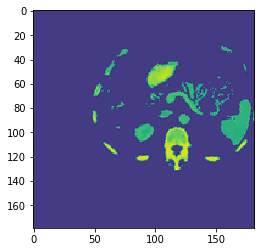

11 = 114 angle 12
8 = 110 9


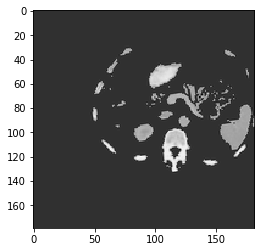

best angle is  8 th picture at eqm of = 110 at an angle 9
with vect translation of 1 17


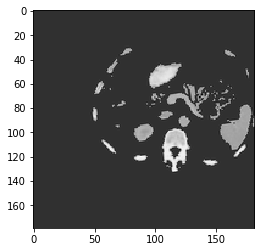

In [100]:
# coding: utf-8

# Etape1 : ouverture des images satellitaires

# importation des librairies
from scipy import ndimage
import cv2
#import imageio
#write this inst "import ImageOps" to use this inst "gray=imageOps.grayscale(img)" to convert an image to gray lvl (dl an biblio named ImageOps is REQUIRED)
#ce rq precedent est valable pour biblio "Image" with the same requirement
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mplib
import math



def ReadAffiche(ImageFile):###fonction de lecture d'image 
    try:
            img = mpimg.imread(ImageFile) #ImageFile est un chaine de caracteres d'image d'entrée avec  
                                            #point suivi de son extension et eventuellement with avec le repertoire
                                            ##img est un 
                                            ##matrice 3d (ne veut pas dire modele 3d) mais 
                                            ##contient successivement
                                            #dans la 1er dimension:coordonné x du pixel
                                            #dans le 2eme dimension:coordonné y du pixel
                                            #dans le 3eme dimension:niveau couleur du pixel
    
    except IOError: ##le cas si fichier a lire est inexistant
        print('ERREUR ,l\'image:' + ImageFile+'NON trouvé')
        sys.exit(1)
    
    # affichge du titre d'image
    print(ImageFile+":")
    
    # affichage de l'image
    plt.imshow(img)
    plt.show()
    return img##retour d'image lue en tant que matrice au 3axes (pas en tant que modele 3d) qui contient successivement
                #dans la 1er dimension:coordonné x du pixel
                #dans le 2eme dimension:coordonné y du pixel
                #dans le 3eme dimension:niveau couleur du pixel

            
            
            
def Seuillage(img,threshold,crop): #tableau d'occurence des intesités du couleur
                    #img est une matrice image d'entré
                    #s=seuil de couleur en instensite rgb [0,255]
                    
    
    if(len(img.shape)==2):#si l'image d'entrée est 2d
        
        
        
        ir=np.zeros((img.shape))
        largeur,hauteur=img.shape ### attribution des variable avec des valeur de l'image d'entrée 

        occ=np.zeros(256)#occR=occurence de niveau de rouge
    
        occPt=[[] for i in range(256)]#occpt est l'ensemble des points repartie en fonction
                                            #les intensite de colueur a partir d'un histograme (equalize ou non
        ##########CREATION d'axe de occurence de niveau de couleur
#print(clr) pour le debogage



        ###parcour des pixel par pixel par 2 boucle imbrique (premier en largeur et 2eme en hauteur)
        x=0   #initialison coordonné x
        while(x<largeur): #condition d'arret du coordonné x pour eviter l'overflow 
            #print("while")
            y=0 #initialison coordonné y
            while(y<hauteur):#condition d'arret du coordonné y pour eviter l'overflow
                #print(x,y) #pour le debogage
                occ[int(img[x,y])]=occ[int(img[x,y])]+1 ##incrementation d'occurence au un niveau de couleur ROUGE donné au 
                        #occR[niveau de couleur deja en entier]
                occPt[int(img[x,y])].append([x,y]) ##incrementation d'occurence au un niveau de couleur ROUGE donné au 

                y=y+1
            x=x+1    


        #print(clr)
            ###increment d'intesite du colueur si il existe dans coordonnées x,y d'image d'entrée 
        ###creation du 2nd axe (axe horizontal) pour les intensite couleur au niveau de gris avec pas de 1


        nbPxTotal=largeur*hauteur

        ##Creation du cdf
        edf=np.zeros(256)

        chdf=np.zeros(256)

        s=0
        S=0



        #plt.rcParams["figure.figsize"] = [15,10] ##change le taille du figure par format d'image (proportions)
                                                 #(la taille d'image qui englobe 
                                                 #tous les element tel que:
                                                 #le plot,les axe mais pas la legende)
                                                 ## pas seulment la courbe au sens du 
                                                 #la multiplication du fonction mathematiquement par un scalaire
                                                 #si egale [15,10] on aura hd-like representaion

        index=np.arange(256) ###un tablau 1d pour les valeur possible du niveau de couleur
                                #temporaire utilisé pour racourcir un peu le code

        plt.plot(index,occ[index],color='red', linewidth=0.9) ###mise en scene du courbe occR (nombre 
                                                                ##d'occourence du niveau du couleur 
                                                                ##rouge) en fonction index et 
                                                                ##epaisseur 0.9 (defualt est 1) (j'ai un 
                                                                ##peu raccouci pour
                                                                ##une meilleur precision)

    
        plt.xlabel('les intensité du couleur')
        plt.ylabel('BEFORE les occurence des instensite')
        plt.show()




        cog=(0,0)
        sx=[]
        sy=[]
        
        
        
        xmin,ymin=10**6,10**6
        xmax,ymax=0,0
        
        
        for i in range(0,256):
            for j in range(0,len(occPt[i])):     
                x,y=occPt[i][j]
                if(img[x,y]<=threshold):
                    ir[x,y]=0
                else:
                    ir[x,y]=img[x,y]
                    sx.append(x)
                    sy.append(y)
                    
                    #les point extreme detection
                    if(xmax<x):
                        xmax=x
                    if(ymax<y):
                        ymax=y
                    
                    if(x<xmin):
                        xmin=x
                    if(y<ymin):
                        ymin=y
        HitboxHeight=np.abs(ymax-ymin)
        
        
        if(crop==True):
            ir=ir[xmin:xmax,ymin:ymax]
            ##new cog is base on new size of recently cropped picture
            cogx,cogy=int(ir.shape[0]/2),int(ir.shape[1]/2)
            ir[cogx,cogy]=1/2
            return ir,(cogx,cogy)
        else:
            cog=( np.mean(sx) , np.mean(sy) )
            x,y=cog       
            ir[int(x),int(y)]=1 #-e]=0
            return ir,cog

    
def heightBoxSeuilLight(img,threshold):

    
        
    xmin,ymin=10**6,10**6
    xmax,ymax=0,0

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if(1<=img[x,y] and img[x,y]<=threshold):
            
                #les point extreme detection
                if(xmax<x):
                    xmax=x
                if(ymax<y):
                    ymax=y

                if(x<xmin):
                    xmin=x
                if(y<ymin):
                    ymin=y
                #print(ymin,ymax)
    return np.abs(ymax-ymin)

    
    
def rot(img,a):
    #rgb 'est directoire d'image input et a,b sont input argument de translation  sont a en axe x et b en axe y
    
    
    import numpy as np
    
    
    width,height=img.shape
    #x,y actu coord du img input
    nx=0
    ny=0 ##nouveu coordone apre rotation de image output
  
    DistDiagRot=int( np.sqrt( (width/2)**2 + (height/2)**2 )  )
    
    resImage=np.zeros([2*DistDiagRot,2*DistDiagRot])
    
    tempImage=np.zeros([2*DistDiagRot,2*DistDiagRot])
    tempImage[int(2*DistDiagRot+height/2):int(2*DistDiagRot+height/2) ,
              int(2*DistDiagRot+width/2) :int(2*DistDiagRot+width/2) ]=img

    a=a*np.pi/180#conversion vers radian
    ###bcl en passant par tout les val de 3rd parametre des pixl des img aka (0,..2) aka for all colors
    
    
    
    for i in range(width):
        for j in range(height):
    
            ##trt de coord de each pixel
            #rx,ry=np.cos(a)*x+y*np.sin(a),-np.sin(a)*x+y*np.cos(a)
            b=[i,j]#deja transposé a l'initialisation
            r=[[np.cos(a),-np.sin(a)],
               [np.sin(a), np.cos(a)]]
            r=np.dot(b,r)
            
            
            
            #on a fait de cette aproche de translation: nx=x+a au lieu multiplier les matices car ils sont la version courte de multiplication matriciele
            #affectation using nx et ny et PB we need array of nx et ny (both) because WE ACTUALLY USE ONLY ONE VAL IN THIS BCL
                    ##SI ON NE DEPASSE PAS LES DIMENSION DE LIMAGE
            
            
            #print('c',i,j)
            #print('r',r[0],r[1])
            
            #if(ry<0 or ry>height):
            resImage[int(r[0]),int(r[1])]=float(img[i,j]/255)
            #if(rx<0 or rx>width):
                #tempImage[int(rx),int(ry)]=float(img[x,y]/255)
            
            #print("wip x=",x,"y=",y,"c=",c,"pxcol=",img[x,y,c],"newpxcol",tempImage[nx,ny,c],"x+a",x+a,"y+b",y+b)
    
        #ig=np.dot(img[:,:,0],R)     #rot

            #affect clr val in new x,y after rot 

        ###reception du noueveau position apres la rotation

    mpimg.imsave("rot-translation.jpg",tempImage,cmap="gray");
    #save pic with name "test-translation.jpg"
    
    return resImage[DistDiagRot-height:  DistDiagRot+height,
                     DistDiagRot-width :  DistDiagRot+height]

    

    
    

def tran(img,a,b):
    #rgb 'est directoire d'image input et a,b sont input argument de translation  sont a en axe x et b en axe y
    width,height=img.shape
    #x,y actu coord du img input
    nx=0
    ny=0 ##nouveu coordone apre rotation de image output
  
    tempImage=np.zeros([width,height])
    

    
    ###bcl en passant par tout les val de 3rd parametre des pixl des img aka (0,..2) aka for all colors
    
    x=0
    while(x+a<width and 0<=x+a):
        y=0
        
        while(y+b<height and 0<=y+b):
            ##trt de coord de each pixel
            rx=int(x+a)
            ry=int(y+b) #on a fait de cette aproche de translation: nx=x+a au lieu multiplier les matices car ils sont la version courte de multiplication matriciele
            #affectation using nx et ny et PB we need array of nx et ny (both) because WE ACTUALLY USE ONLY ONE VAL IN THIS BCL
                    ##SI ON NE DEPASSE PAS LES DIMENSION DE LIMAGE
            tempImage[rx,ry]=float(img[x,y]/255)
            #print("wip x=",x,"y=",y,"c=",c,"pxcol=",img[x,y,c],"newpxcol",tempImage[nx,ny,c],"x+a",x+a,"y+b",y+b)
            y=y+1
        x=x+1

        #ig=np.dot(img[:,:,0],R)     #rot

            #affect clr val in new x,y after rot 

        ###reception du noueveau position apres la rotation

    mpimg.imsave("test-translation.jpg",tempImage,cmap="gray");
    #save pic with name "test-translation.jpg"
    
    return tempImage


def tranV2forNegativeVal(img,a,b):
    #rgb 'est directoire d'image input et a,b sont input argument de translation  sont a en axe x et b en axe y
    width,height=img.shape
    #x,y actu coord du img input
    nx=0
    ny=0 ##nouveu coordone apre rotation de image output
  
    tempImage=np.zeros([width,height])
    

    
    ###bcl en passant par tout les val de 3rd parametre des pixl des img aka (0,..2) aka for all colors
    
    x=0
    while(x<width and 0<=x):
        y=0
        
        while(y<height and 0<=y):
            ##trt de coord de each pixel
            rx=int(x+a)
            ry=int(y+b) #on a fait de cette aproche de translation: nx=x+a au lieu multiplier les matices car ils sont la version courte de multiplication matriciele
            #affectation using nx et ny et PB we need array of nx et ny (both) because WE ACTUALLY USE ONLY ONE VAL IN THIS BCL
                    ##SI ON NE DEPASSE PAS LES DIMENSION DE LIMAGE
            tempImage[rx,ry]=float(img[x,y]/255)
            #print("wip x=",x,"y=",y,"c=",c,"pxcol=",img[x,y,c],"newpxcol",tempImage[nx,ny,c],"x+a",x+a,"y+b",y+b)
            y=y+1
        x=x+1

        #ig=np.dot(img[:,:,0],R)     #rot

            #affect clr val in new x,y after rot 

        ###reception du noueveau position apres la rotation

    mpimg.imsave("test-translation.jpg",tempImage,cmap="gray");
    #save pic with name "test-translation.jpg"
    
    return tempImage

ImageFile = 'og.jpg'
imgCBL=ReadAffiche(ImageFile)

imgCBL=(0.3 * imgCBL[:,:,0] + 0.59 * imgCBL[:,:,1] + 0.11 * imgCBL[:,:,2])
print(imgCBL)
plt.imshow(imgCBL/255.0, cmap='gray')
plt.show()



SimgCBL,cogCBL=Seuillage(imgCBL,50,False)
print(cogCBL)
plt.imshow(SimgCBL/255, cmap='gray')
plt.show()



####ILL PIC cog

    
ImageFile = 'ill.jpg'
imgSRC=ReadAffiche(ImageFile)



imgSRC=0.3 * imgSRC[:,:,0] + 0.59 * imgSRC[:,:,1] + 0.11 * imgSRC[:,:,2]


SimgSRC,imgSRC=Seuillage(imgSRC,50,True)
print(imgSRC)
plt.imshow(SimgSRC/255.0, cmap='gray')
plt.show()




def eqm(imgSRC,imgMOD):#og et mod sont des chaine de caracter de nom de fichier image pour l'image original et 
                #image modifié (PAR ORDRE)
    #imgSRC=ReadAffiche(og)
    #imgMOD=ReadAffiche(mod)
    
    m,n=imgSRC.shape #les variable m et n de taille d'image original sufiit car il a la 
                    #meme taille que celle d'image modifié
    
    eqm=0 #eqm initial
    
    x=0 #coordonée d'image originale et celle du modifié (car ces 2 images ont la meme dimension)    
    while(x<m): ##jusqua largeur de TMj.BMP
        y=0
        while(y<n):##jusqua hauteur de TMj.BMP 

            eqm=eqm+(   np.abs( imgSRC[x,y]-imgMOD[x,y] )   )**2 #formulation du sommation par des 
                                                                        #3 boucles imbriques au niveau de longueur,largeur et niveau du couleur 

            y=y+1
        x=x+1
        
    return eqm/(m*n) ##on met au final la divion sur les dimensions m et n







##compare image original (bmp) avec png

imgMOD=np.ones( (imgCBL.shape) )

for i in range(imgCBL.shape[0]):
    for j in range(imgCBL.shape[1]):
        imgMOD[i,j]=0
    

m,n=SimgSRC.shape

plt.imshow(SimgSRC/255,cmap='gray')
plt.show()

plt.imshow(imgMOD/255,cmap='gray')
plt.show()

imgMOD[:m,:n]=SimgSRC

dx=np.abs(imgSRC[0]-cogCBL[0])
dy=np.abs(imgSRC[1]-cogCBL[1])

imgMOD=tran(imgMOD,dx,dy)#np.abs(ILLcogx-OGcogx),np.abs(ILLcogy-OGcogy)  )

plt.imshow(imgMOD/255,cmap='gray')
plt.show()

ecart=eqm(imgMOD,SimgCBL)

print('eqm',ecart)


ecarts=[]
angles=[]
angle=0
imgfinal=[]
for i in range(0,20):
    print(angle)
    imgr=ndimage.rotate(imgMOD, angle, reshape=False)
    ecarts.append(    eqm(imgr,SimgCBL)   )
    imgfinal.append(imgr)
    print(i,'=',ecarts[i],'angle',angle)
    
    #plt.imshow(imgr/255,cmap='gray')
    #plt.show()
    i=i+1
    angles.append(angle)
    angle=angle+0.1

print(  ecarts.index(   min(ecarts)  ),'=' ,min(ecarts) , angles[ ecarts.index(   min(ecarts)  ) ]  )
plt.imshow(          imgfinal[ ecarts.index(   min(ecarts)  )    ]/255,cmap='gray'       )      
plt.show()
    
#imgDiff= np.abs(  np.abs(imgMOD)   -    np.abs(SimgCBL)   )

#plt.imshow(imgDiff/255,cmap='gray')
#plt.show()





print("best angle is ",  ecarts.index(   min(ecarts)  ),'th picture at eqm of =' ,min(ecarts) ,'at an angle', angles[ ecarts.index(   min(ecarts)  ) ]  )
print("with vect translation of",dx,dy)
plt.imshow(          imgfinal[ ecarts.index(   min(ecarts)  )    ]/255,cmap='gray'       )      
plt.show()
    



imf=tran(imgMOD,dx,dy)#np.abs(ILLcogx-OGcogx),np.abs(ILLcogy-OGcogy)  )


imf=ndimage.rotate(imgCBL, 1.900, reshape=False)
plt.imshow(imf/255,cmap='gray')
plt.show()

plt.imshow(imgCBL/255,cmap='gray')
plt.show()

e=eqm(imf,imgCBL)
print('difference:',e)

imEcart=imf-imgCBL
plt.imshow(imEcart/255,cmap='gray')
plt.show()


# partie 2



ImageFile = 'CT pancreas source.bmp'
imgSRC=ReadAffiche(ImageFile)

imgSRC=(0.3 * imgSRC[:,:,0] + 0.59 * imgSRC[:,:,1] + 0.11 * imgSRC[:,:,2])
print(imgSRC.shape)
plt.imshow(imgSRC/255.0, cmap='gray')
plt.show()



SimgSRC,cogSRC=Seuillage(imgSRC,140,False)#colorier le fond noir en un fond strictment noir (exactement d'intensité nulle) 
SimgSRC[140:,:]=0#elemination des partie non necessares en les convertissant en pixels strictement noir
SimgSRC[:,:32]=0#elemination des partie non necessares en les convertissant en pixels strictement noir

SimgSRC,cogSRC=Seuillage(SimgSRC,140,False)#actualiser le centre de gravité

print(cogSRC)
test=np.zeros((imgSRC.shape[0],imgSRC.shape[1],3))
test[:,:,0]=SimgSRC
test[:,:,1]=SimgSRC
test[:,:,2]=SimgSRC
test[int(cogSRC[0]),int(cogSRC[1]),0]=255
#+np.array((0,10))

plt.imshow(test/255)
plt.show()


plt.imshow(SimgSRC/255, cmap='gray')
plt.show()



ImageFile = 'CT pancreas.bmp'
imgCBL=ReadAffiche(ImageFile)

imgCBL=(0.3 * imgCBL[:,:,0] + 0.59 * imgCBL[:,:,1] + 0.11 * imgCBL[:,:,2])
print(imgCBL.shape)

plt.imshow(imgCBL/255.0, cmap='gray')
plt.show()



SimgCBL,cogCBL=Seuillage(imgCBL,140,False)
#SimgSRC[140:,:]=0#elemination des partie non necessares en les convertissant en pixels strictement noir
SimgCBL,cogCBL=Seuillage(SimgCBL,140,False)
cogCBL=(imgCBL.shape[0]/2,imgCBL.shape[1]/2)



print(cogCBL)
plt.imshow(SimgCBL/255, cmap='gray')
plt.show()


test=np.zeros((imgCBL.shape[0],imgCBL.shape[1],3))
test[:,:,0]=SimgCBL
test[:,:,1]=SimgCBL
test[:,:,2]=SimgCBL
test[int(cogCBL[0]),int(cogCBL[1]),0]=255


plt.imshow(test/255.0)
plt.show()




dx,dy=int(np.abs(cogCBL[0]-cogSRC[0])),int(np.abs(cogCBL[1]-cogSRC[1]))

imgMOD=tran(SimgSRC,dx,dy)

plt.imshow(imgMOD,cmap='gray')
plt.show()



ecarts=[]
angles=[]
angle=1
imgfinal=[]

for i in range(0,12):
    print(angle)
    imgr=ndimage.rotate(imgMOD, angle, reshape=False)
    
    plt.imshow(imgr)
    plt.show()
    

    
    ecarts.append(   heightBoxSeuilLight(imgr,175)   )
    imgfinal.append(imgr)
    print(i,'=',ecarts[i],'angle',angle)
    
    plt.imshow(imgr/255,cmap='gray')
    #plt.show()
    i=i+1
    angles.append(angle)
    angle=angle+1

print(  ecarts.index(   min(ecarts )  ),'=' ,min(ecarts ) , angles[ ecarts.index(   min(ecarts)  ) ]  )
plt.imshow(          imgfinal[ ecarts.index(   min(ecarts)  )    ]/255,cmap='gray'       )      
plt.show()

#imgDiff= np.abs(  np.abs(imgMOD)   -    np.abs(SimgCBL)   )

#plt.imshow(imgDiff/255,cmap='gray')
#plt.show()





print("best angle is ",  ecarts.index(   min(ecarts)  ),'th picture at eqm of =' ,min(ecarts) ,'at an angle', angles[ ecarts.index(   min(ecarts)  ) ]  )
print("with vect translation of",dx,dy)
plt.imshow(          imgfinal[ ecarts.index(   min(ecarts)  )    ]/255,cmap='gray'       )      
plt.show()
    


# In[94]:

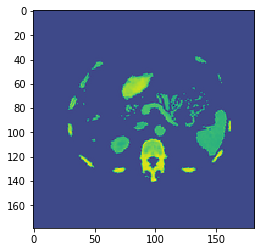

358 364
89


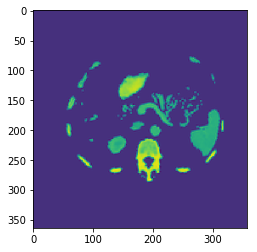

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


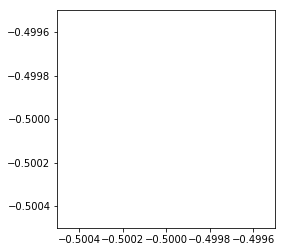

In [102]:
#angle optimal est 11 deg
imgr=ndimage.rotate(imgMOD, angle, reshape=False)
imgr=tranV2forNegativeVal(imgr,0,-20)
imgr=tran(imgr,10,0)


plt.imshow(imgr)
plt.show()



sf=2#sf is scaling factor

w=imgr.shape[0]
l=imgr.shape[1]

wf=int(sf*w)
lf=int(sf*l)
print(wf,lf)



imgr = cv2.resize(imgr, (wf, lf))
#imgr=cv2.imresize(imgMOD, 0.5)

print(int(np.abs(w-wf)/2))
tmp=imgr[int(np.abs(w-wf)/2)         :         int(np.abs(wf-np.abs(w-wf))/2),
         int(np.abs(l-lf)/2)          :        int(np.abs(lf-np.abs(l-lf))/2)
        ]

plt.imshow(imgr)
plt.show()


plt.imshow(tmp)
plt.show()